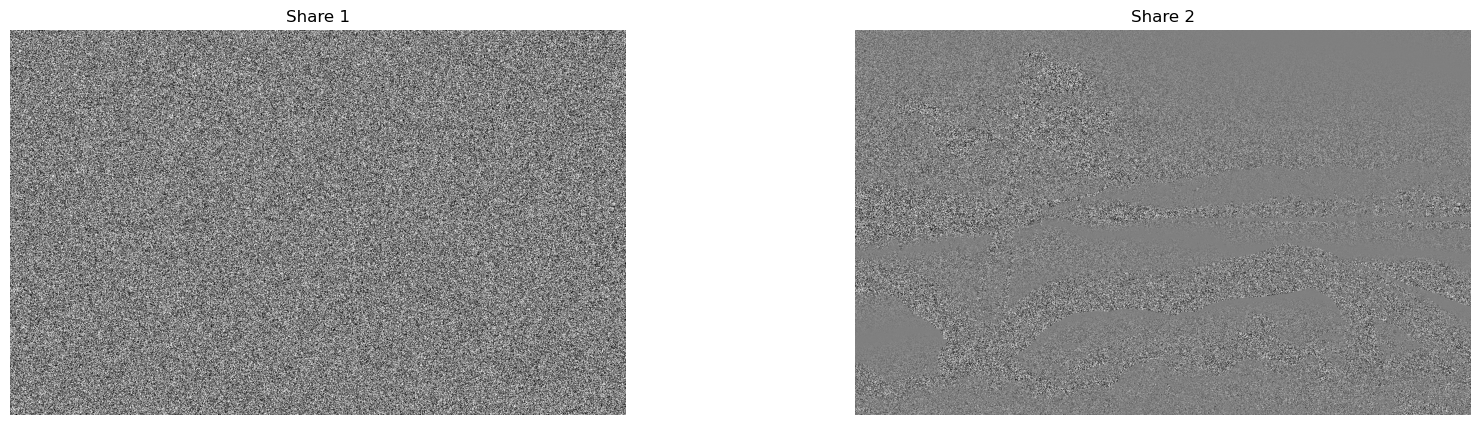

In [12]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "image.jpg"
image = Image.open(image_path)

# Convert image to grayscale
image = image.convert("L")

# Convert image to numpy array
image_array = np.array(image)

# Function to generate random binary image (share)
def generate_share(image):
    # Create a random binary image with the same dimensions as the original image
    random_share = np.random.randint(2, size=image.shape)
    # Invert the random share (to make it visually compatible with the original image)
    random_share[random_share == 0] = 255
    return random_share.astype(np.uint8)

# Generate shares
share1 = generate_share(image_array)
share2 = np.bitwise_xor(image_array, share1)

# Create PIL images from numpy arrays
share1_img = Image.fromarray(share1)
share2_img = Image.fromarray(share2)
share1_img.save("share1.jpg")
share2_img.save("share2.jpg")


# Display shares
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.imshow(share1_img, cmap='gray')
plt.title('Share 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(share2_img, cmap='gray')
plt.title('Share 2')
plt.axis('off')

plt.show()


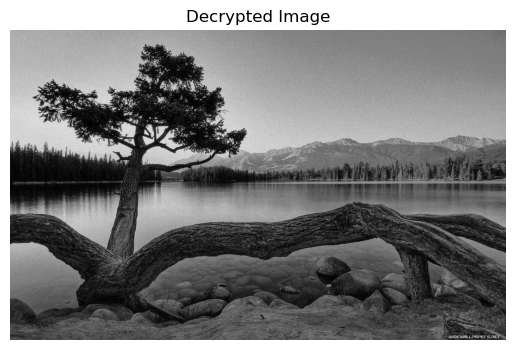

In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the shares
share1_path = "share1.jpg"
share2_path = "share2.jpg"

share1 = Image.open(share1_path).convert("L")
share2 = Image.open(share2_path).convert("L")

# Convert shares to numpy arrays
share1_array = np.array(share1)
share2_array = np.array(share2)

# Perform XOR operation to decrypt the image
decrypted_image_array = np.bitwise_xor(share1_array, share2_array)


# Create PIL image from decrypted array
#decrypted_image = Image.fromarray(decrypted_image_array)
decrypted_image = Image.fromarray(decrypted_image_array,)


# Display the decrypted image
plt.imshow(decrypted_image, cmap='gray')
plt.title('Decrypted Image')
plt.axis('off')
plt.show()


In [ ]:
import random
import string

while True:
 chars =" " + string.punctuation + string.digits + string.ascii_letters
 chars = list(chars)
 key = chars.copy()
 random.shuffle(key)
 #print(f"chars: {chars}")
 print(f"key : {key}")

#encryption

 ct= input("enter the passwaord:")
 pt= ""

 for letter in ct:
    index= key.index(letter)
    pt += chars[index]
    
 print(f"encrypted message password : {ct}")
 print(f"decrypted password : {pt}")

In [1]:
!pip install rsa

  Obtaining dependency information for rsa from https://files.pythonhosted.org/packages/49/97/fa78e3d2f65c02c8e1268b9aba606569fe97f6c8f7c2d74394553347c145/rsa-4.9-py3-none-any.whl.metadata


In [ ]:
import rsa

with open("public.pem", "rb") as f:
    publick = rsa.PublicKey.load_pkcs1(f.read())
with open("private.pem", "rb") as f:
    privatek = rsa.PrivateKey.load_pkcs1(f.read())
    
message = "hello guys"
emessage = rsa.encrypt(message.encode(), publick)
#print(emessage)

with open("encrypted.message", "wb") as f:
    f.write(emessage)

In [5]:
import rsa


with open("public.pem", "wb") as f:
    f.write(publick.save_pkcs1("PEM"))
with open("private.pem", "wb") as f:
    f.write(privatek.save_pkcs1("PE
                                
                                
                                

SyntaxError: unterminated string literal (detected at line 7) (2041615130.py, line 7)

In [6]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the shares
share1_path = "share1.jpg"
share2_path = "share2.jpg"

share1 = Image.open(share1_path)
share2 = Image.open(share2_path)

# Convert shares to numpy arrays
share1_array = np.array(share1)
share2_array = np.array(share2)

# Perform XOR operation separately on each color channel
decrypted_image_array = np.zeros_like(share1_array)
for i in range(3):  # Loop through each color channel (R, G, B)
    decrypted_image_array[:,:,i] = np.bitwise_xor(share1_array[:,:,i], share2_array[:,:,i])

# Create PIL image from decrypted array
decrypted_image = Image.fromarray(decrypted_image_array, 'RGB')

# Display the decrypted image
plt.imshow(decrypted_image)
plt.title('Decrypted Image')
plt.axis('off')
plt.show()


IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [1]:
!pip install cv2
































ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


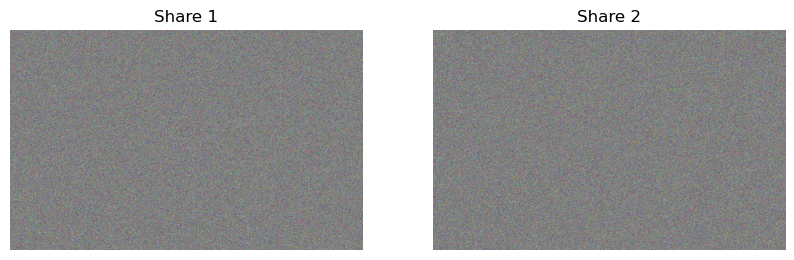

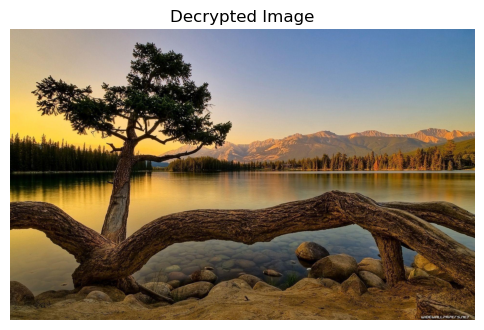

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Function to split an image into two shares
def split_image(image_path):
    original_image = Image.open(image_path)
    width, height = original_image.size
    
    # Create two blank images for shares
    share1 = Image.new("RGB", (width, height), "white")
    share2 = Image.new("RGB", (width, height), "white")
    
    # Iterate through each pixel of the original image
    for x in range(width):
        for y in range(height):
            pixel = original_image.getpixel((x, y))
            # Generate random numbers for shares
            rand1 = np.random.randint(256, size=3)
            rand2 = np.bitwise_xor(np.array(pixel), rand1)
            # Set pixels of shares
            share1.putpixel((x, y), tuple(rand1))
            share2.putpixel((x, y), tuple(rand2))
    
    return share1, share2

# Function to decrypt image from two shares using XOR operation
def decrypt_image(share1, share2):
    width, height = share1.size
    decrypted_image = Image.new("RGB", (width, height), "white")
    
    # Iterate through each pixel of the shares and perform XOR operation
    for x in range(width):
        for y in range(height):
            pixel_share1 = share1.getpixel((x, y))
            pixel_share2 = share2.getpixel((x, y))
            decrypted_pixel = tuple(np.bitwise_xor(np.array(pixel_share1), np.array(pixel_share2)))
            decrypted_image.putpixel((x, y), decrypted_pixel)
    
    return decrypted_image

# Encrypt and decrypt a colored image using visual cryptography
original_image_path = "image.jpg"  # Change this to your image path

# Split the original image into two shares
share1, share2 = split_image(original_image_path)

# Display the shares
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(share1)
plt.title('Share 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(share2)
plt.title('Share 2')
plt.axis('off')
plt.show()

# Decrypt the image using XOR operation on shares
decrypted_image = decrypt_image(share1, share2)

# Display the decrypted image
plt.figure(figsize=(6, 6))
plt.imshow(decrypted_image)
plt.title('Decrypted Image')
plt.axis('off')
plt.show()


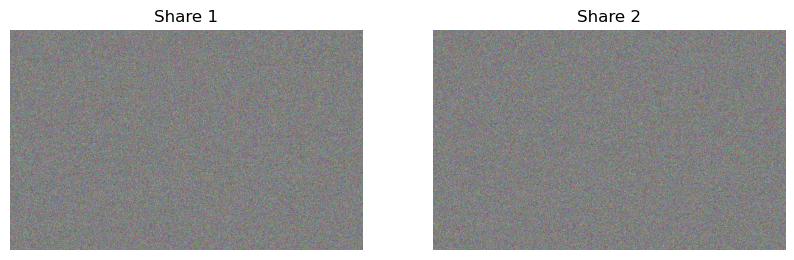

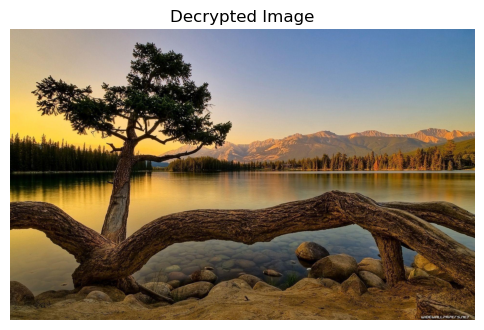

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Function to split an image into two shares using a key
def split_image(image_path, key):
    original_image = Image.open(image_path)
    width, height = original_image.size
    
    # Create two blank images for shares
    share1 = Image.new("RGB", (width, height), "white")
    share2 = Image.new("RGB", (width, height), "white")
    
    # Seed the random number generator with the key
    np.random.seed(sum(ord(char) for char in key))
    
    # Iterate through each pixel of the original image
    for x in range(width):
        for y in range(height):
            pixel = original_image.getpixel((x, y))
            # Generate random numbers for shares
            rand1 = np.random.randint(256, size=3)
            rand2 = np.bitwise_xor(np.array(pixel), rand1)
            # Set pixels of shares
            share1.putpixel((x, y), tuple(rand1))
            share2.putpixel((x, y), tuple(rand2))
    
    return share1, share2

# Function to decrypt image from two shares using XOR operation
def decrypt_image(share1, share2):
    width, height = share1.size
    decrypted_image = Image.new("RGB", (width, height), "white")
    
    # Iterate through each pixel of the shares and perform XOR operation
    for x in range(width):
        for y in range(height):
            pixel_share1 = share1.getpixel((x, y))
            pixel_share2 = share2.getpixel((x, y))
            decrypted_pixel = tuple(np.bitwise_xor(np.array(pixel_share1), np.array(pixel_share2)))
            decrypted_image.putpixel((x, y), decrypted_pixel)
    
    return decrypted_image

# Encrypt and decrypt a colored image using visual cryptography with a key
original_image_path = "image.jpg"  # Change this to your image path
encryption_key = "my_secret_key"  # Change this to your desired key

# Split the original image into two shares using the key
share1, share2 = split_image(original_image_path, encryption_key)

# Display the shares
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(share1)
plt.title('Share 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(share2)
plt.title('Share 2')
plt.axis('off')
plt.show()

# Decrypt the image using XOR operation on shares
decrypted_image = decrypt_image(share1, share2)

# Display the decrypted image
plt.figure(figsize=(6, 6))
plt.imshow(decrypted_image)
plt.title('Decrypted Image')
plt.axis('off')
plt.show()
